## Disclaimer previo:
He invertido una cantidad de tiempo limitada porque sino el trabajo puede ser infinito. Puede que haya que mejorar cosas, o matizar aspectos. Pero creía interesentante recalcar que me he puesto un límite de tiempo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
path='stolen_motorbikes_dgt_2024.xlsx'

In [59]:
df=pd.read_excel(path)

In [60]:
df

,registration_date,stolen_date,brand,model,province
0,2005-06-23,2019-01-01 00:00:00,HONDA,SH125,M
1,2015-11-02,2019-01-01 00:00:00,HONDA,ANC125,B
2,2011-05-06,2019-01-01 00:00:00,YAMAHA,YP125R,SS
3,1995-05-12,2019-01-01 00:00:00,HONDA,NH 90,GR
4,2011-02-09,2019-01-01 00:00:00,S.Y.M,GTS 125 EVO,CE
...,...,...,...,...,...
36607,2017-05-12,2024-10-31 00:00:00,KYMCO,SUPER DINK 350,M
36608,2022-03-11,2024-10-31 00:00:00,PEUGEOT,TWEET,MA
36609,2021-01-28,2024-10-31 00:00:00,HONDA,SH125AD,B
36610,2018-03-12,2024-10-31 00:00:00,PEUGEOT,TWEET,B


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36612 entries, 0 to 36611
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   registration_date  36612 non-null  datetime64[ns]
 1   stolen_date        36612 non-null  object        
 2   brand              36612 non-null  object        
 3   model              36588 non-null  object        
 4   province           36506 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 1.4+ MB


Empiezo pasando las fechas a formato datetime, sacando el año del robo como variable a parte, la antigüedad en años y días, y el año del robo a int64.

In [62]:
df['stolen_date']=pd.to_datetime(df['stolen_date'], errors="coerce").dt.date

df['stolen_date']=pd.to_datetime(df['stolen_date'])

df['antiguedad']=df['stolen_date']-df['registration_date']

df['año_robo']=df['stolen_date'].dt.year

df[['brand', 'model']]\
.drop_duplicates().sort_values(by=(['brand', 'model'])).to_excel('modelos_marcas.xlsx')

df['antiguedad_años'] = round(df['antiguedad'] / pd.to_timedelta(365.25, unit='D'),1)

df['año_robo'].astype='int64'

# ¿Se ha reducido el número de robos en los últimos cinco años?

Saco primero el conteo por provincias, para así comparar el total con alguna provincia que destaque.

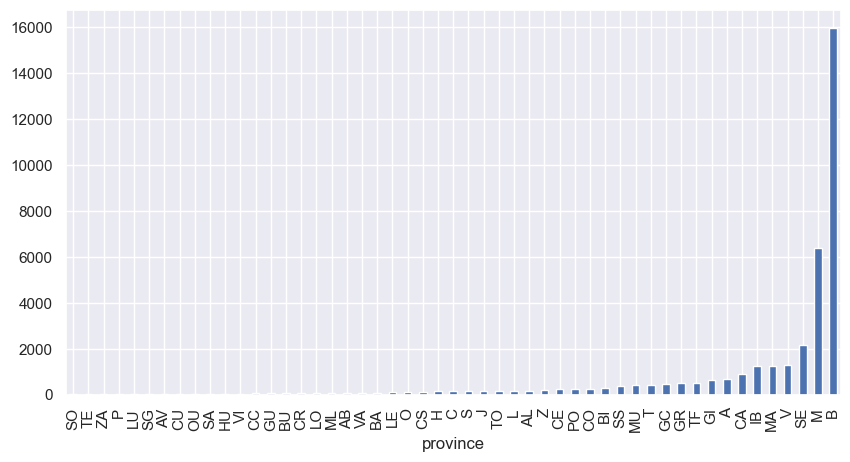

In [139]:
df.groupby('province')['antiguedad'].count().sort_values().plot.bar(figsize=(10,5));

Comparo la evolución en años con Barcelona y Madrid.

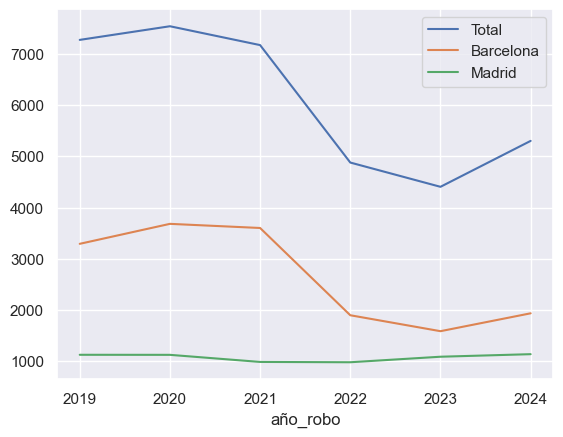

In [143]:
fig, ax1 = plt.subplots()
df.groupby(['año_robo'])['antiguedad'].count().plot(label='Total')

df[(df['province']=='B')].groupby(['año_robo'])['antiguedad'].count().plot(label='Barcelona')

df[(df['province']=='M')].groupby(['año_robo'])['antiguedad'].count().plot(label='Madrid')

ax1.legend()

Es evidente que el número de robos se ha reducido considerablemente en los ultimos años, con un repunte en 2024

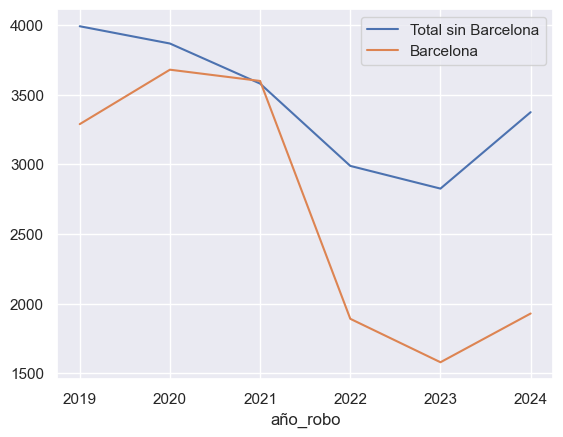

In [135]:
fig, ax1 = plt.subplots()
df[(df['province']!='B')].groupby(['año_robo'])['antiguedad'].count().plot(label='Total sin Barcelona')
df[(df['province']=='B')].groupby(['año_robo'])['antiguedad'].count().plot(label='Barcelona')
ax1.legend()

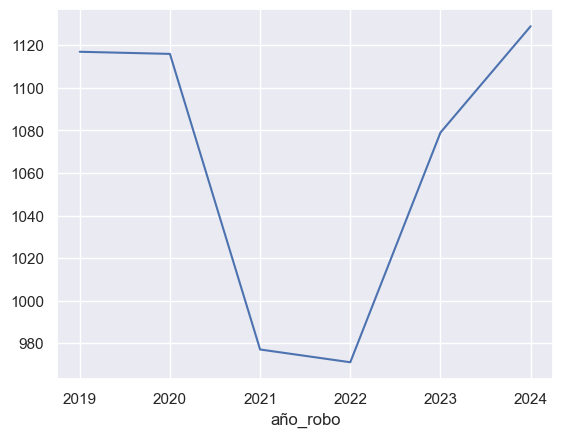

In [145]:
df[(df['province']=='M')].groupby(['año_robo'])['antiguedad'].count().plot(label='Madrid');

Parece que algo cambió a partir de 2021 porque los robos de estas motos cayeron en picado a partir de este año. Llegaron a caer un 75% aproximadamente.

Con los datos disponibles no podemos saber más pero podemos ver qué tendencias han seguido los ladrones a partir de este punto de inflexión.

En Madrid pasa lo mismo, aunque la caída es mucho menor, si que hay una caída en 2021.

#  ¿Hay alguna marca que destaque?

## nº robos por marca

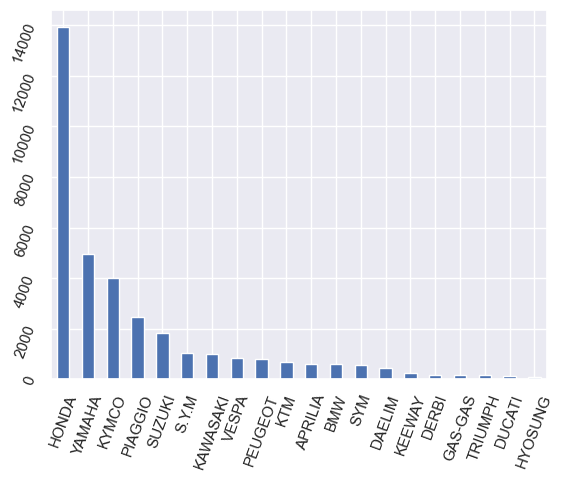

In [65]:
fig, ax = plt.subplots()
df['brand'].value_counts().sort_values(ascending=False).head(20).plot.bar()
ax.tick_params(labelrotation=70)

Honda destaca claramente sobre las demás marcas

## nº robos por marca-modelo

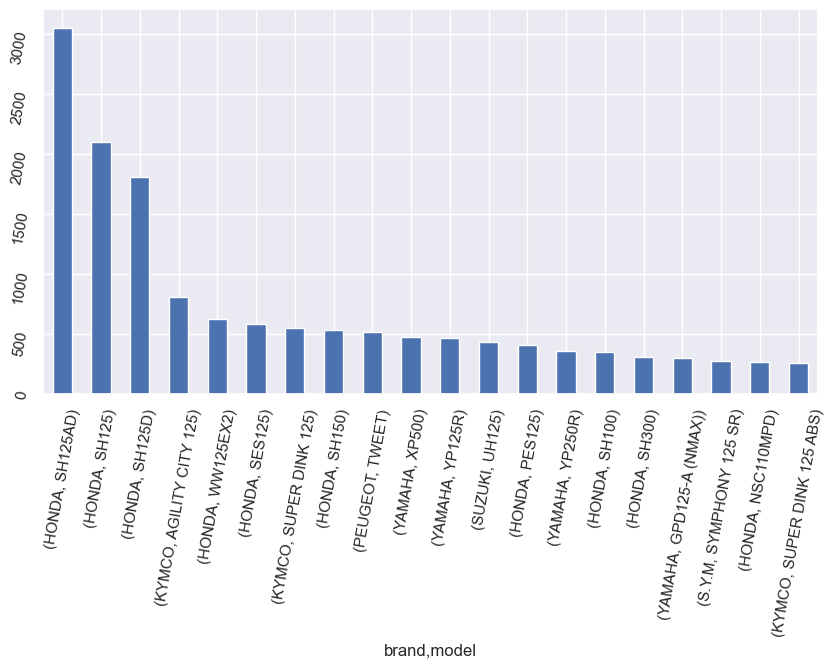

In [66]:
fig, ax = plt.subplots()

df.groupby('brand')['model'].value_counts().sort_values(ascending=False).head(20).plot.bar(figsize=(10,5))
ax.tick_params(labelrotation=80)

Parece que hay un claro ganador, la Honda SH125

De hecho si juntamos todas las Honda SH125, la diferencia será todavía más pronunciada:

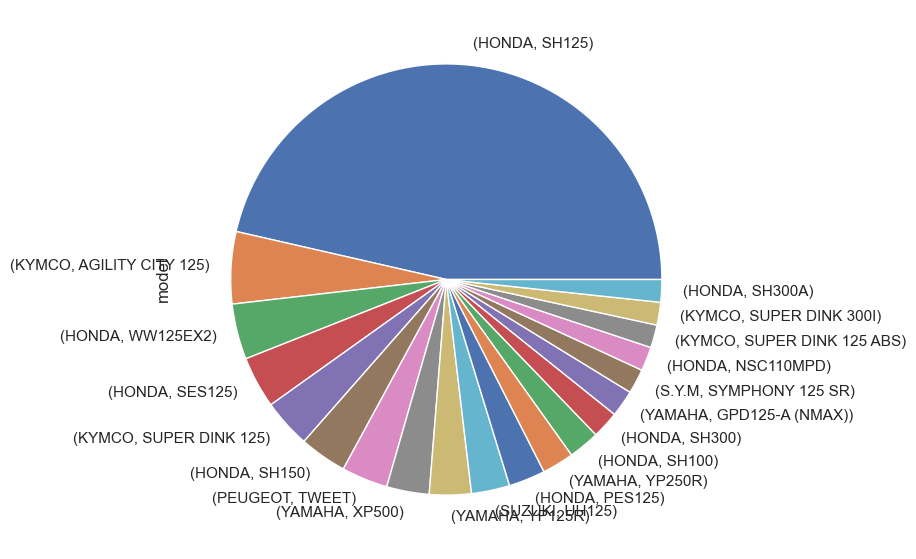

In [146]:
df.loc[df['model'] == 'SH125AD', 'model'] = 'SH125'
df.loc[df['model'] == 'SH125D', 'model'] = 'SH125'

fig, ax = plt.subplots()

df.groupby('brand')['model'].value_counts().sort_values(ascending=False).head(20).plot.pie(figsize=(10,7))
ax.tick_params(labelrotation=80)

Casi 10 veces más que el segundo modelo con más robos. Sería interesante analizar este conjunto ya que lo que le pase a este, influirá de manera significativa en total.

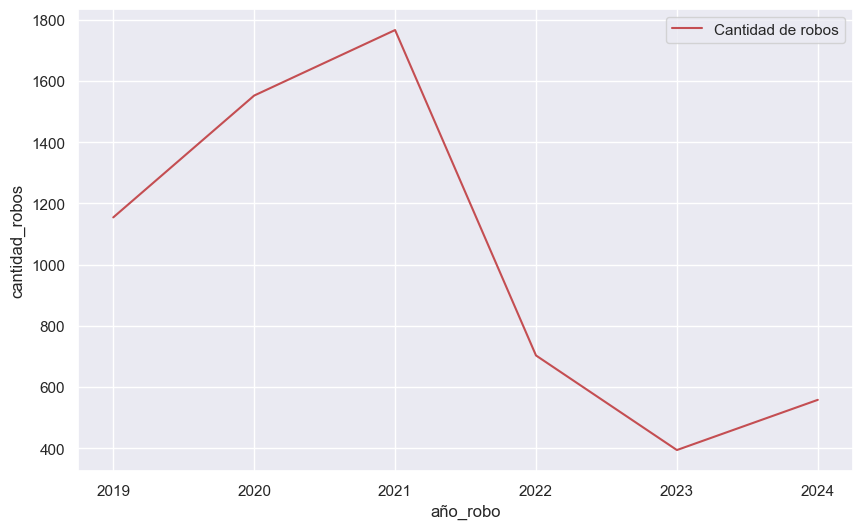

In [134]:
data = df[(df['province'] == 'B')&(df['model'].str.contains('SH125', na=False))].groupby('año_robo').agg(
    antiguedad_promedio=('antiguedad_años', 'mean'),
    cantidad_robos=('antiguedad_años', 'count')
).reset_index()
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.lineplot(
    data=data, x='año_robo', y='cantidad_robos', 
    ax=ax1, color='r', label='Cantidad de robos');

Saco una variable mes-año para analizar la evolución de los robos por meses y tener una granularidad más detallada

C:\Users\110927\AppData\Local\Temp\ipykernel_30824\3262878619.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


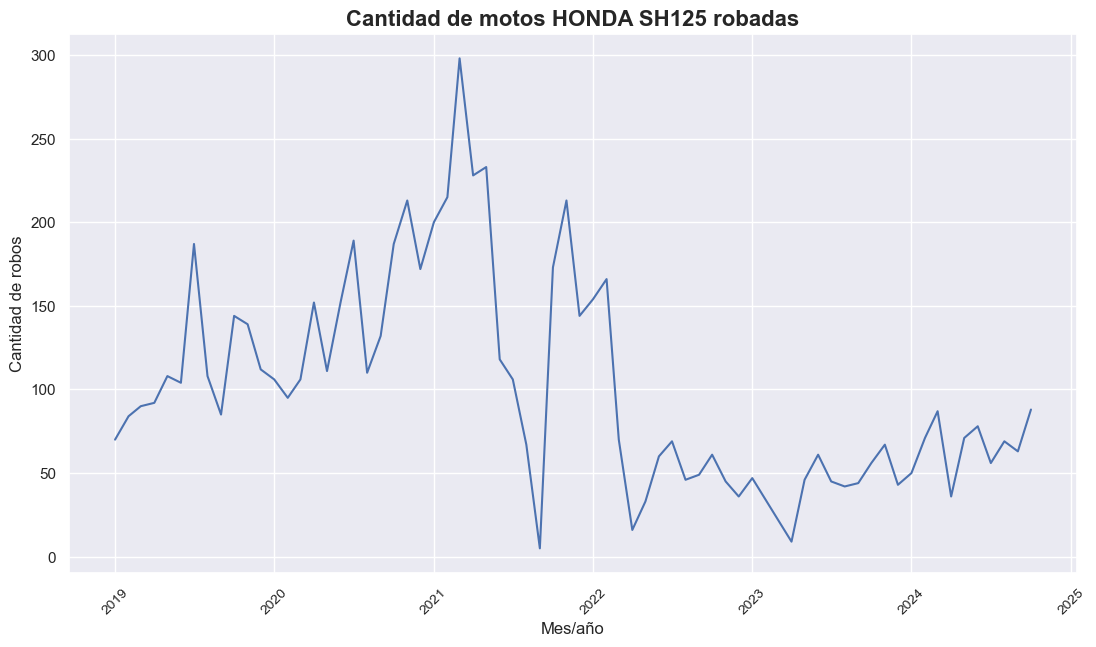

In [124]:
df['mes_robo']=df['stolen_date'].dt.month
df['mes_robo'] = df['mes_robo'].fillna(1)
df['año_mes'] = pd.to_datetime(df['año_robo'].dropna().astype(int).astype(str) + '-' + df['mes_robo'].astype(int).astype(str), format='%Y-%m')
data = df[df['model'].str.contains('SH125', na=False)].groupby('año_mes').size().reset_index(name='cantidad_robos')

plt.figure(figsize=(13, 7))
sns.lineplot(
    data=data, 
    x='año_mes', 
    y='cantidad_robos', 
    palette='Blues_d'
)
plt.title('Cantidad de motos HONDA SH125 robadas', fontsize=16, fontweight='bold')
plt.xlabel('Mes/año', fontsize=12)
plt.ylabel('Cantidad de robos', fontsize=12)
plt.xticks(rotation=45, fontsize=10);


Es significativo ver que el covid apenas afectó a los robos, pero en cambio en 2021 estos bajaron de forma considerable en los meses intermedios. Pudiendo ser causados por inconsistencias en los datos o eventos externos que desconocemos en este análisis.

Voy a sacar un mapa de calor para ver estos atípicos:

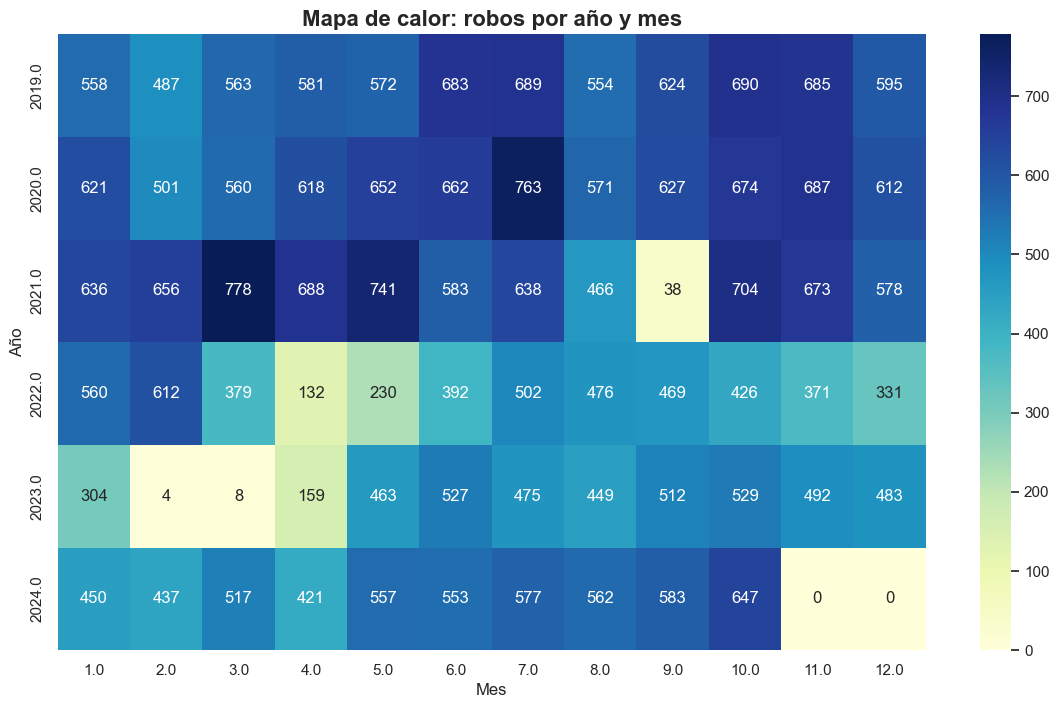

In [164]:
robos_por_año_mes = df.groupby(['año_robo', 'mes_robo']).size().unstack(fill_value=0)
plt.figure(figsize=(14, 8))
sns.heatmap(robos_por_año_mes, cmap='YlGnBu', annot=True, fmt='d', cbar=True)
plt.title('Mapa de calor: robos por año y mes', fontsize=16, fontweight='bold')
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Año', fontsize=12);

Parece que son claramente atipicos los datos de febrero y marzo de 2023, así como septiembre de 2021.

Por otra parte parece que la tendencia descendente en 2022, comienza en marzo para hacerse clara en abril. Habría que confirmar estos datos con eventos pasados.

# Nº robos vs antigüedad

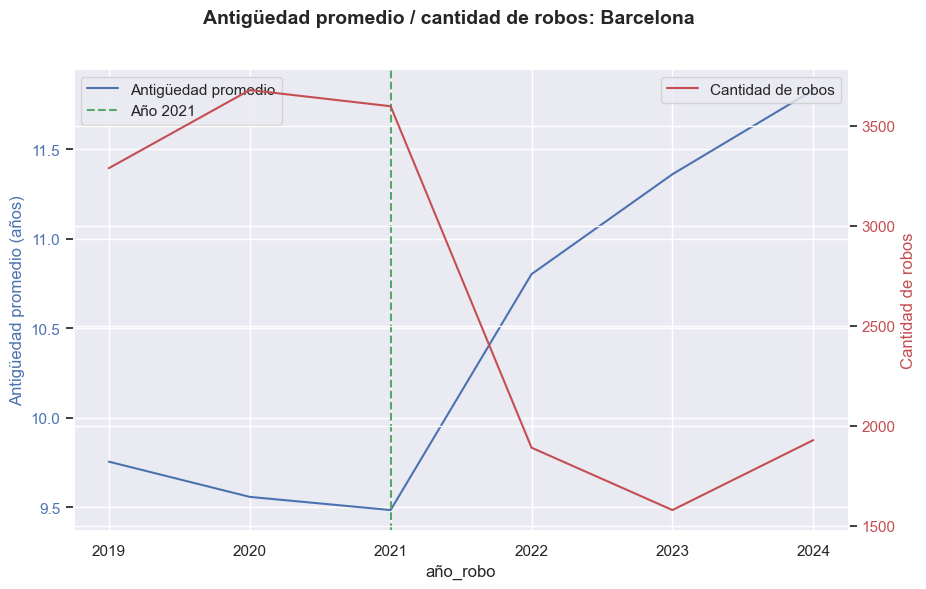

In [156]:
sns.set_theme(style="darkgrid")
data =  df[~df['model'].str.contains('SH125', na=False)&(df['province'] == 'B')].groupby('año_robo').agg(
    antiguedad_promedio=('antiguedad_años', 'mean'),
    cantidad_robos=('antiguedad_años', 'count')
).reset_index()
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.lineplot(
    data=data, x='año_robo', y='antiguedad_promedio', 
    ax=ax1, color='b', label='Antigüedad promedio'
)
ax1.set_ylabel('Antigüedad promedio (años)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax2 = ax1.twinx()
sns.lineplot(
    data=data, x='año_robo', y='cantidad_robos', 
    ax=ax2, color='r', label='Cantidad de robos'
)
ax2.set_ylabel('Cantidad de robos', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax1.axvline(x=2021, color='g', linestyle='--', label='Año 2021')
fig.suptitle('Antigüedad promedio / cantidad de robos: Barcelona', fontsize=14, fontweight='bold')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right');

Comparo la caida de 2021, con la antigüedad de las motos robadas. Podemos ver un insight aquí: A partir de este año las motos robadas en Barcelona empezaron a implementar algún nuevo sistema de seguridad, porque los robos cayeron en picado y los ladrones se tuvieron que centrar en motos de más antigüedad

Si saco el mismo gráfico para las todas las motos que no son SH125:

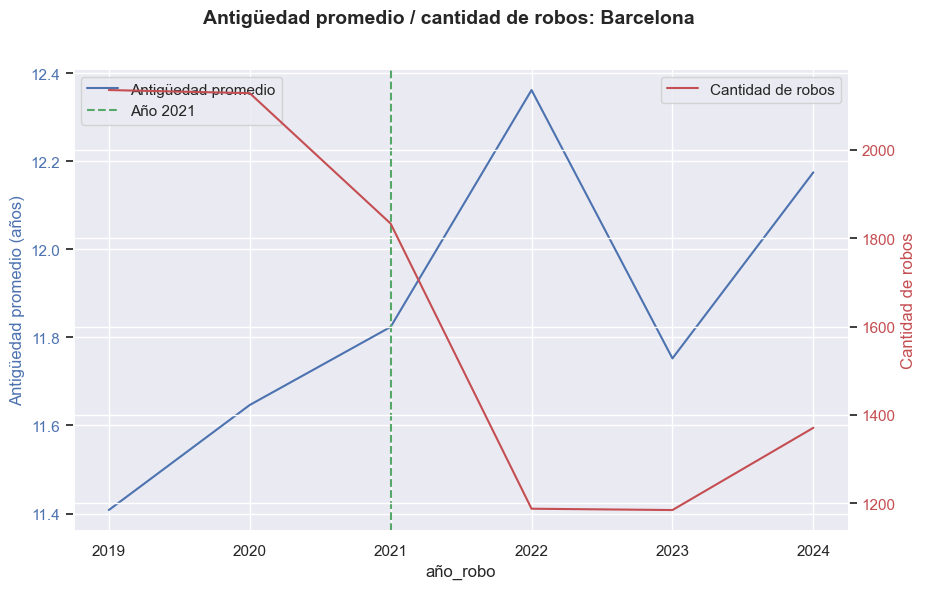

In [157]:
sns.set_theme(style="darkgrid")
data = df[~df['model'].str.contains('SH125', na=False)&(df['province'] == 'B')].groupby('año_robo').agg(
    antiguedad_promedio=('antiguedad_años', 'mean'),
    cantidad_robos=('antiguedad_años', 'count')
).reset_index()
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.lineplot(
    data=data, x='año_robo', y='antiguedad_promedio', 
    ax=ax1, color='b', label='Antigüedad promedio'
)
ax1.set_ylabel('Antigüedad promedio (años)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax2 = ax1.twinx()
sns.lineplot(
    data=data, x='año_robo', y='cantidad_robos', 
    ax=ax2, color='r', label='Cantidad de robos'
)
ax2.set_ylabel('Cantidad de robos', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax1.axvline(x=2021, color='g', linestyle='--', label='Año 2021')
fig.suptitle('Antigüedad promedio / cantidad de robos: Barcelona', fontsize=14, fontweight='bold')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right');

La caida no es tan significativa, pero parece que hay el mismo comportaminto.

# Precios motos

In [166]:
precios=pd.read_excel('precios_modelos_mas_robados.xlsx')

He buscado los precios aproximados de los 10 modelos mas robados:

Creo un nuevo dataset pero solo para estos 10 modelos

In [167]:
df_pr=pd.merge(df,precios, left_on=['brand', 'model'], right_on=['Marca','Modelo'], how='inner')\
.drop(columns=(['brand' , 'model']))

Vamos a ver la relación entre los robos y el precio de los 10 modelos seleccionados, eliminando la SH125 que ya vimos que era la más robada..

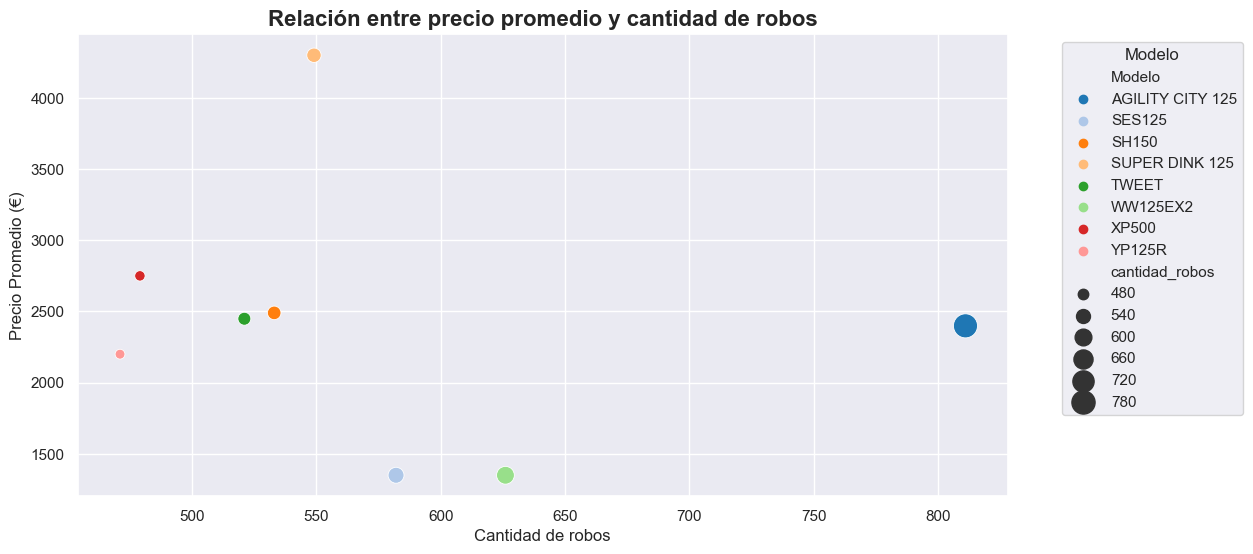

In [191]:
robos_precio = df_pr[df_pr['Modelo']!='SH125'].groupby('Modelo').agg(
    precio_promedio=('Precio Aproximado', 'mean'),cantidad_robos=('Modelo', 'size')).reset_index()
plt.figure(figsize=(12, 6))
sns.scatterplot(data=robos_precio, x='cantidad_robos', y='precio_promedio', 
    hue='Modelo', size='cantidad_robos', sizes=(50, 300), palette='tab20'
)
plt.title('Relación entre precio promedio y cantidad de robos (Sin SH125)', fontsize=16, fontweight='bold')
plt.xlabel('Cantidad de robos', fontsize=12)
plt.ylabel('Precio Promedio (€)', fontsize=12)
plt.legend(title='Modelo', bbox_to_anchor=(1.05, 1), loc='upper left')

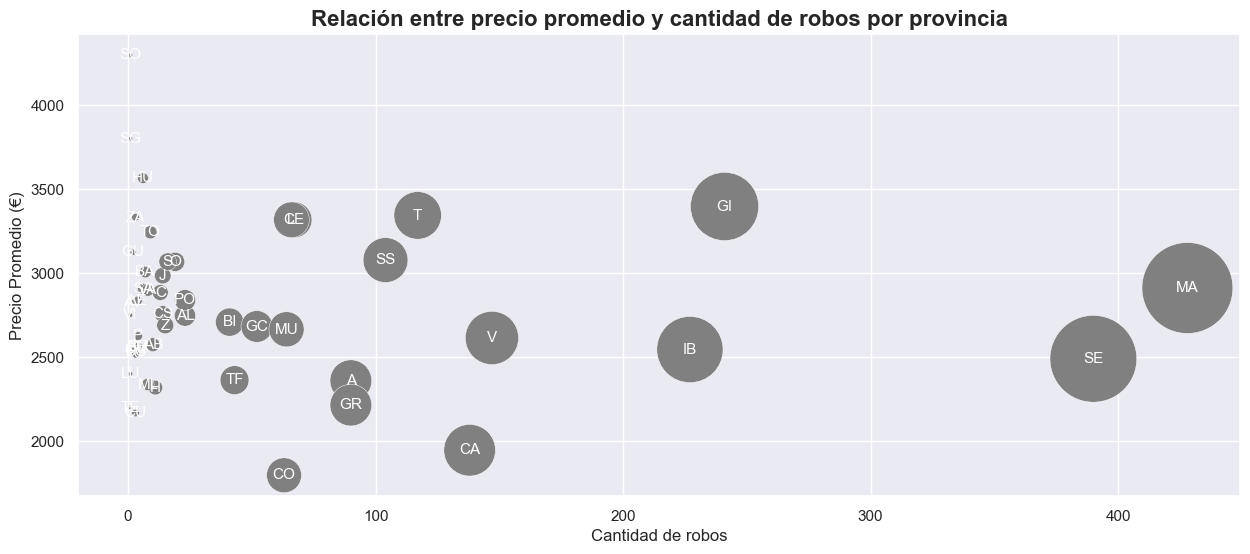

In [193]:
robos_precio_provincia = df_pr[(df_pr['province'] != 'B')&(df_pr['province'] != 'M')].groupby('province').agg(
    precio_promedio=('Precio Aproximado', 'mean'),
    cantidad_robos=('province', 'size')
).reset_index()
plt.figure(figsize=(15, 6))
sns.scatterplot(
    data=robos_precio_provincia, x='cantidad_robos', y='precio_promedio', 
    s=robos_precio_provincia['cantidad_robos']*10, color='grey')
for i in range(len(robos_precio_provincia)):
    plt.text(
        robos_precio_provincia['cantidad_robos'][i], 
        robos_precio_provincia['precio_promedio'][i], 
        robos_precio_provincia['province'][i],
        fontsize=11, ha='center', va='center', color='white'
    )
plt.title('Relación entre precio promedio y cantidad de robos por provincia', fontsize=16, fontweight='bold')
plt.xlabel('Cantidad de robos', fontsize=12)
plt.ylabel('Precio Promedio (€)', fontsize=12)
plt.legend([], [], frameon=False)

<Axes: xlabel='año_robo'>

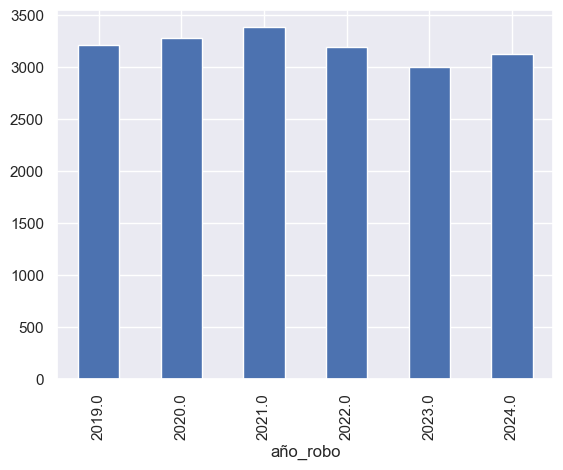

In [73]:
df_pr.groupby('año_robo')['Precio Aproximado'].mean().round(0).plot.bar()

<Axes: xlabel='province'>

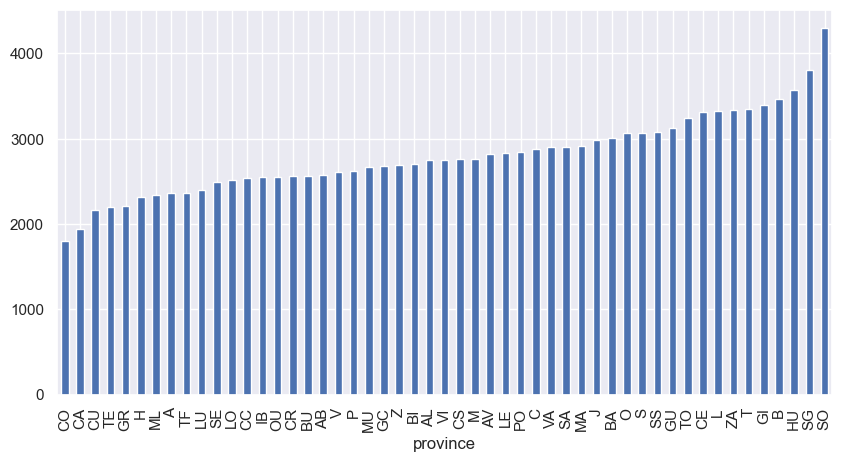

In [74]:
df_pr.groupby('province')['Precio Aproximado'].mean().sort_values().plot.bar(figsize=(10,5))

# Por provincias

Eliminando las principales provincias nos queda este gráfico:

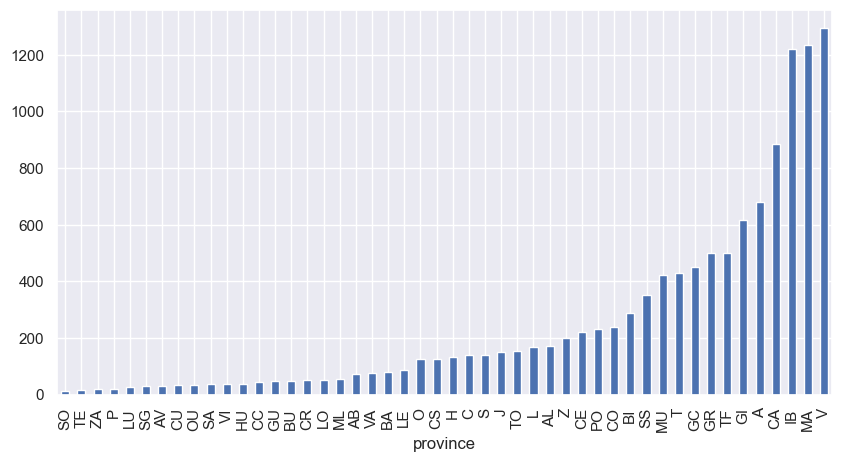

In [75]:
df[(df['province']!='B')&(df['province']!='M')&(df['province']!='SE')].\
groupby('province')['antiguedad'].count().sort_values().plot.bar(figsize=(10,5));

Cruzando la antigüedad de las motos robadas con 

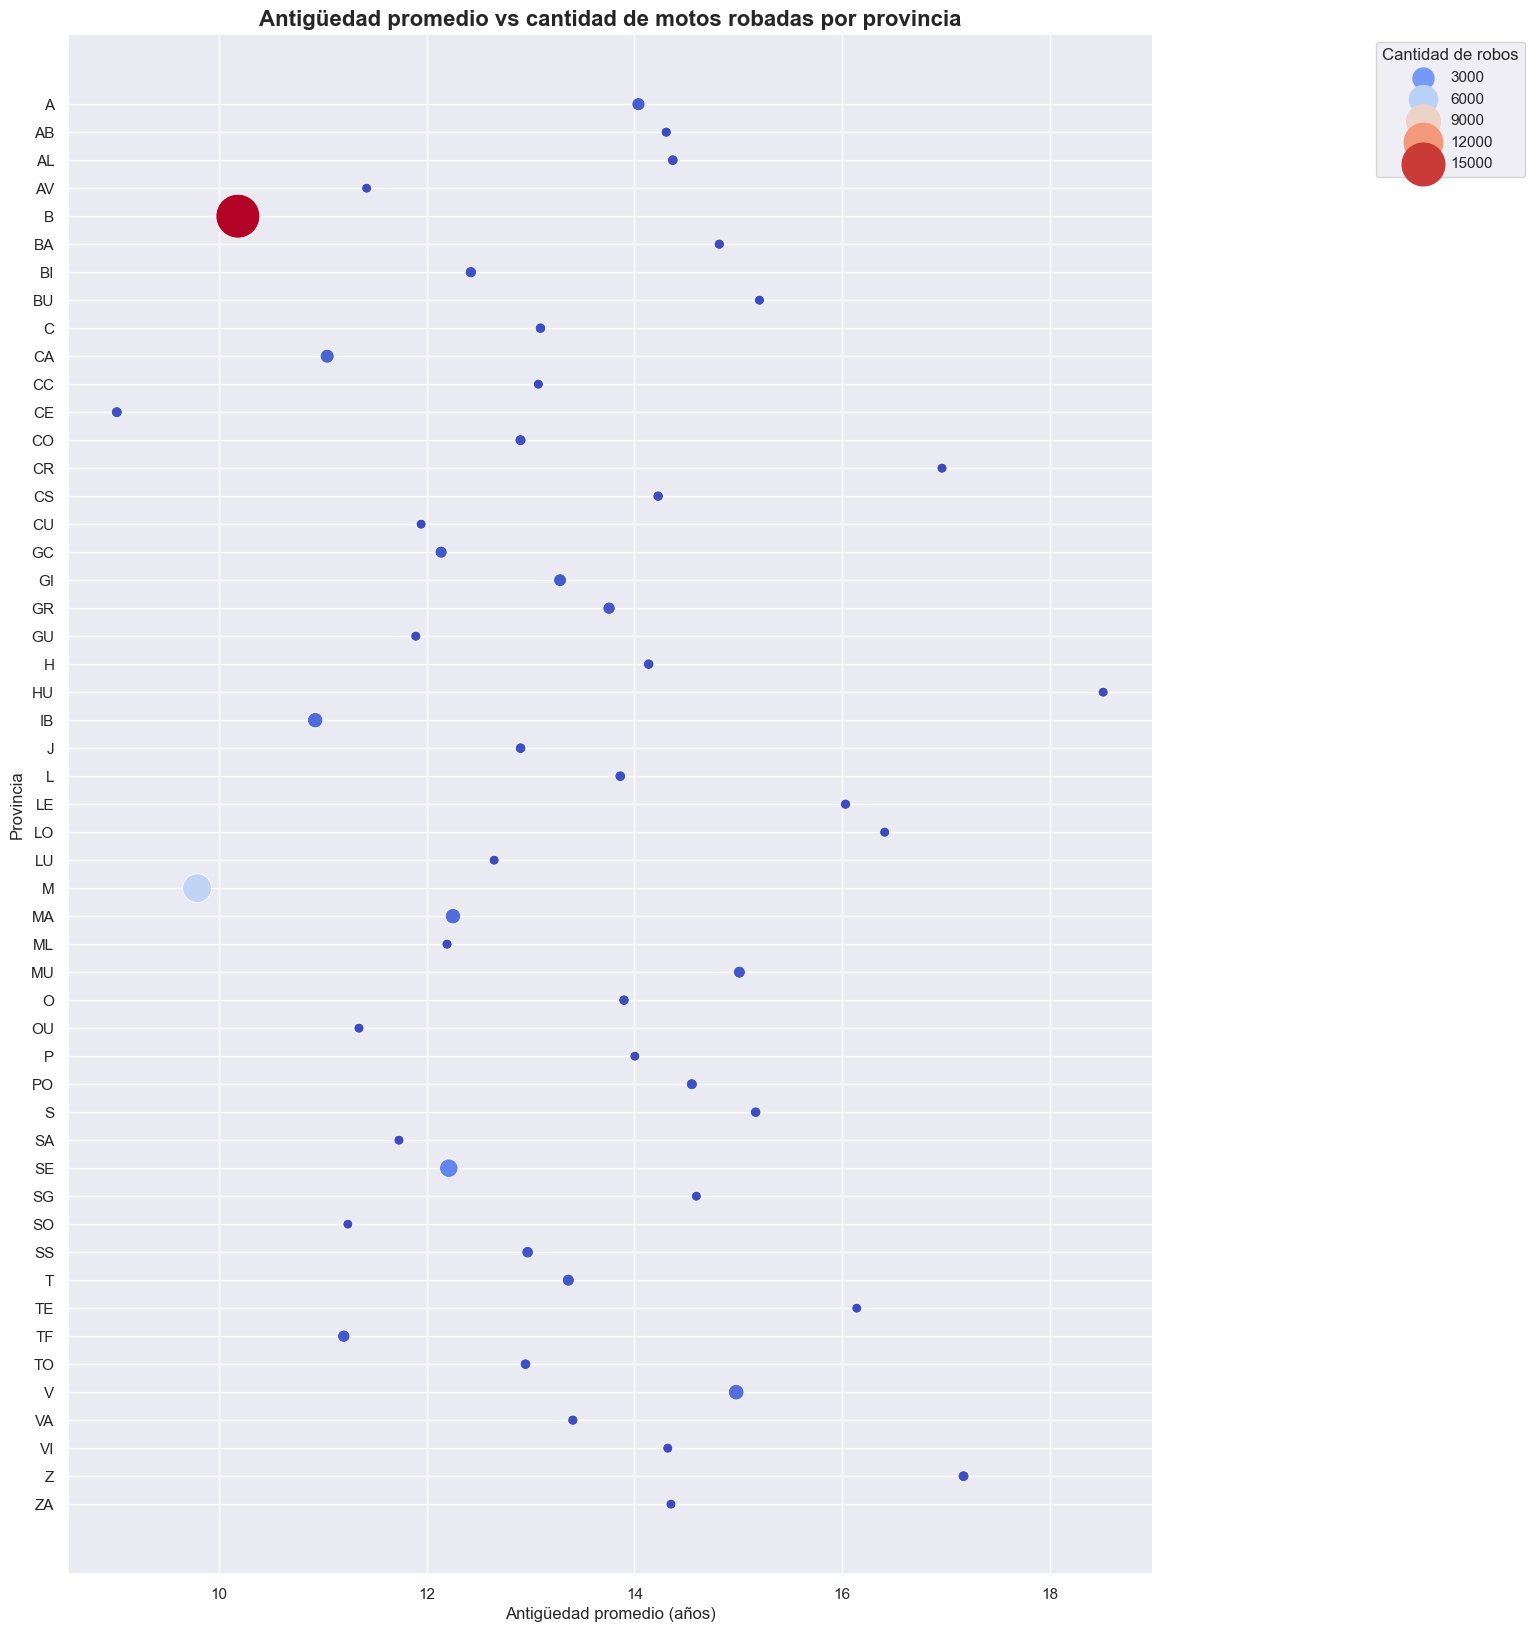

In [160]:
data = df.groupby('province').agg(
    antiguedad_promedio=('antiguedad_años', 'mean'),
    cantidad_robos=('antiguedad_años', 'count')
).reset_index()
plt.figure(figsize=(14, 20))
scatter = sns.scatterplot(data=data, x='antiguedad_promedio', y='province', size='cantidad_robos', sizes=(50, 1000), hue='cantidad_robos',palette='coolwarm'
)
plt.title('Antigüedad promedio vs cantidad de motos robadas por provincia', fontsize=16, fontweight='bold')
plt.xlabel('Antigüedad promedio (años)', fontsize=12)
plt.ylabel('Provincia', fontsize=12)
scatter.legend(title='Cantidad de robos', loc='upper right', bbox_to_anchor=(1.35, 1));

Parece que las principales ciudades se mueven en torno a los mismos valores de antigüedad

# Conclusiones

- Barcelona es la provincia donde hay más robos con mucha diferencia.
- Honda es la marca que más se roba.
- La Honda 125 es el modelo que más se roba ocupando casi la mitad de los robos.
- En 2021 (Marzo) hubo algún ajuste a las SH125 que hizo que sus robos bajasen.
- Cuando este ajuste se produjo, los ladrones optaron por robar motos más antiguas, que seguramente no llevasen consigo la mejora.